In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import glob
import PIL
import cv2

In [2]:
config = tf.compat.v1.ConfigProto(allow_soft_placement=True)
config.gpu_options.per_process_gpu_memory_fraction = 0.7
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [3]:
train=glob.glob('D:/迅雷下载/Dataset2/Dataset 2/*.png')
test=glob.glob('D:/迅雷下载/Dataset2/Dataset 2/*.bmp')
train


['D:/迅雷下载/Dataset2/Dataset 2\\001.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\002.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\003.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\004.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\005.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\006.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\007.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\008.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\009.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\010.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\011.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\012.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\013.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\014.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\015.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\016.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\017.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\018.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\019.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\020.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\021.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\022.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\023.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\024.png',
 'D:/迅雷下载/Dataset2/Dataset 2\\025.png',


In [4]:
def read(x):
    img=tf.io.read_file(x)
    img=tf.io.decode_bmp(img,channels=3)
    img=tf.image.resize(img,[256,256])
    img=tf.cast(img,tf.float32)
    img=img/127.5-1
    return img

In [5]:
def out(x):
    imgs=tf.io.read_file(x)
    imgs=tf.io.decode_png(imgs,channels=1)
    imgs=tf.image.resize(imgs,[256,256])
    imgs=tf.cast(imgs,tf.float32)
    imgs=imgs/255.0
    return imgs

In [6]:
from PIL import Image


In [7]:
a=Image.open(train[0])
len(a.split())

1

In [8]:
out( train[2]).shape

TensorShape([256, 256, 1])

In [9]:
tarin_img=tf.data.Dataset.from_tensor_slices(train)
test_img=tf.data.Dataset.from_tensor_slices(test)
my_train=tarin_img.map(out)
my_test=test_img.map(read)
all_img=tf.data.Dataset.zip((my_test,my_train))
all_img

<ZipDataset shapes: ((256, 256, 3), (256, 256, 1)), types: (tf.float32, tf.float32)>

In [10]:
trains=all_img.take(len(test))
train_data=trains.repeat().shuffle(len(test)).batch(4)
train_data

<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 1)), types: (tf.float32, tf.float32)>

In [11]:
inputs=tf.keras.Input(shape=(256,256,3))
covn1=tf.keras.layers.Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(inputs)
covn1=tf.keras.layers.BatchNormalization()(covn1)
covn2=tf.keras.layers.Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(covn1)
covn2=tf.keras.layers.BatchNormalization()(covn2)
pool1=tf.keras.layers.MaxPool2D(pool_size=(2,2))(covn2)
covn3=tf.keras.layers.Conv2D(128,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool1)
covn3=tf.keras.layers.BatchNormalization()(covn3)
covn4=tf.keras.layers.Conv2D(128,3,activation='relu',padding='same',kernel_initializer='he_normal')(covn3)
covn4=tf.keras.layers.BatchNormalization()(covn4)
pool2=tf.keras.layers.MaxPool2D(pool_size=(2,2))(covn4)
covn5=tf.keras.layers.Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool2)
covn5=tf.keras.layers.BatchNormalization()(covn5)
covn6=tf.keras.layers.Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(covn5)
covn6=tf.keras.layers.BatchNormalization()(covn6)
pool3=tf.keras.layers.MaxPool2D(pool_size=(2,2))(covn6)
covn7=tf.keras.layers.Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool3)
covn7=tf.keras.layers.BatchNormalization()(covn7)
covn8=tf.keras.layers.Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(covn7)
covn8=tf.keras.layers.BatchNormalization()(covn8)
pool4=tf.keras.layers.MaxPool2D(pool_size=(2,2))(covn8)
covn9=tf.keras.layers.Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool4)
covn9=tf.keras.layers.BatchNormalization()(covn9)
covn10=tf.keras.layers.Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(covn9)
covn10=tf.keras.layers.BatchNormalization()(covn10)
up1=tf.keras.layers.UpSampling2D(size=(2,2))(covn10)
up1=tf.keras.layers.BatchNormalization()(up1)
data1=tf.keras.layers.Conv2D(512,2,padding='same',activation='relu',kernel_initializer='he_normal')(up1)
data1=tf.keras.layers.BatchNormalization()(data1)
add1=tf.keras.layers.concatenate([data1,covn8],axis=3)
covn11=tf.keras.layers.Conv2D(512,3,padding='same',activation='relu',kernel_initializer='he_normal')(add1)
covn11=tf.keras.layers.BatchNormalization()(covn11)
covn12=tf.keras.layers.Conv2D(512,3,padding='same',activation='relu',kernel_initializer='he_normal')(covn11)
covn12=tf.keras.layers.BatchNormalization()(covn12)
up2=tf.keras.layers.UpSampling2D(size=(2,2))(covn12)
up2=tf.keras.layers.BatchNormalization()(up2)
data2=tf.keras.layers.Conv2D(256,2,padding='same',activation='relu',kernel_initializer='he_normal')(up2)
data2=tf.keras.layers.BatchNormalization()(data2)
add2=tf.keras.layers.concatenate([data2,covn6],axis=3)
covn13=tf.keras.layers.Conv2D(256,3,padding='same',activation='relu',kernel_initializer='he_normal')(add2)
covn13=tf.keras.layers.BatchNormalization()(covn13)
covn14=tf.keras.layers.Conv2D(256,3,padding='same',activation='relu',kernel_initializer='he_normal')(covn13)
covn14=tf.keras.layers.BatchNormalization()(covn14)
up3=tf.keras.layers.UpSampling2D(size=(2,2))(covn14)
up3=tf.keras.layers.BatchNormalization()(up3)
data3=tf.keras.layers.Conv2D(128,2,padding='same',activation='relu',kernel_initializer='he_normal')(up3)
add3=tf.keras.layers.concatenate([data3,covn4],axis=3)
covn15=tf.keras.layers.Conv2D(128,3,padding='same',activation='relu',kernel_initializer='he_normal')(add3)
covn15=tf.keras.layers.BatchNormalization()(covn15)
covn16=tf.keras.layers.Conv2D(128,3,padding='same',activation='relu',kernel_initializer='he_normal')(covn15)
covn16=tf.keras.layers.BatchNormalization()(covn16)
up4=tf.keras.layers.UpSampling2D(size=(2,2))(covn16)
up4=tf.keras.layers.BatchNormalization()(up4)
data4=tf.keras.layers.Conv2D(64,2,padding='same',activation='relu',kernel_initializer='he_normal')(up4)
add4=tf.keras.layers.concatenate([data4,covn2],axis=3)
covn17=tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',kernel_initializer='he_normal')(add4)
covn17=tf.keras.layers.BatchNormalization()(covn17)
covn18=tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',kernel_initializer='he_normal')(covn17)
covn18=tf.keras.layers.BatchNormalization()(covn18)
covn19=tf.keras.layers.Conv2D(2,3,padding='same',activation='relu',kernel_initializer='he_normal')(covn18)
covn20=tf.keras.layers.Conv2D(1,1,activation='sigmoid')(covn19)

In [12]:
covn20.shape

TensorShape([None, 256, 256, 1])

In [13]:
model=tf.keras.models.Model(inputs=inputs,outputs=covn20)

In [14]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       batch_normalization[0][0]        
_______________________________________________________________________________________

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['acc'])

In [16]:
num=len(test)//4

In [17]:
model.fit(train_data,steps_per_epoch=num,epochs=50)

Epoch 1/50


InternalError:  Failed launching ResizeNearestNeighbor
	 [[node functional_1/up_sampling2d/resize/ResizeNearestNeighbor (defined at <ipython-input-17-5821d95ec4a7>:1) ]] [Op:__inference_train_function_6902]

Function call stack:
train_function


In [40]:
#model.save('E:/杂物/model/U-NET细胞图像语义分割-精细.h5')

In [18]:
e=read(test[2])
image=tf.expand_dims(e,0)

In [42]:
data_img=model.predict(image)

In [43]:
png=tf.keras.preprocessing.image.array_to_img(data_img[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


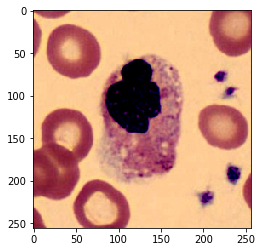

In [44]:
plt.imshow(read(test[20]))

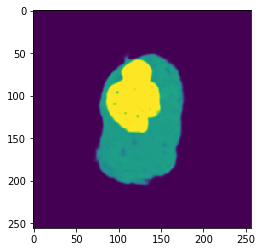

In [45]:
plt.imshow(png)

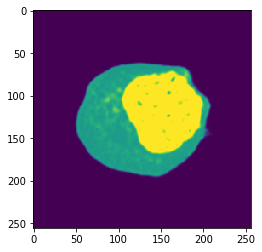

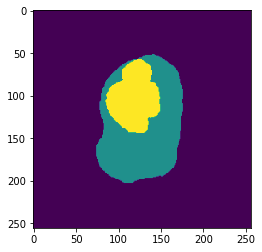